In [1]:
import numpy as np
data2 = np.load('./output_3D/output_keypoints_3d.npz') # 데이터 로드. @파일명
data2['reconstruction'].shape

(180, 17, 3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def quaternion_to_matrix(q):
    """Convert a quaternion into a rotation matrix."""
    w, x, y, z = q
    return np.array([
        [1 - 2 * (y * y + z * z), 2 * (x * y - z * w), 2 * (x * z + y * w)],
        [2 * (x * y + z * w), 1 - 2 * (x * x + z * z), 2 * (y * z - x * w)],
        [2 * (x * z - y * w), 2 * (y * z + x * w), 1 - 2 * (x * x + y * y)]
    ])

vals = data2['reconstruction'][0]

# The rotation quaternion
rot = [0.1407056450843811, -0.1500701755285263, -0.755240797996521, 0.6223280429840088]

# Convert the quaternion to a rotation matrix
R = quaternion_to_matrix(rot)

# Rotate the points
vals_rot = vals.dot(R.T)

# Your existing plotting code, but using vals_rot instead of vals
fig = plt.figure(figsize=(15, 5.4))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=-0.00, hspace=0.05)
ax = plt.subplot(gs[0], projection='3d')

# I = np.array([0, 0, 1, 4, 2, 5, 0, 7, 8, 8, 14, 15, 11, 12, 8, 9])
# J = np.array([1, 4, 2, 5, 3, 6, 7, 8, 14, 11, 15, 16, 12, 13, 9, 10])
# LR = np.array([0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 2])
# # [오골,왼골,오허,왼허,오정,왼종,아래허리,위허리,어깨,어깨,,,,,,머리]
ax.scatter3D(0,0,0, color='r' )
I = np.array([1, 4, 5, 1, 2, 1, 14, 15, 8, 8, 11,12,11])
J = np.array([4, 5, 6, 2, 3, 14, 15, 16, 14, 11, 12, 13,4])

lcolor = (0, 0, 1)
rcolor = (1, 0, 0)
hipcolor = (0, 0, 0)

for i in range(len(I)):
    x, y, z = [np.array([vals_rot[I[i], j], vals_rot[J[i], j]]) for j in range(3)]
    ax.plot(x, y, z, lw=2, color=hipcolor)

RADIUS = 0.72
RADIUS_Z = 0.7

xroot, yroot, zroot = vals_rot[0, 0], vals_rot[0, 1], vals_rot[0, 2]
ax.set_xlim3d([-RADIUS + xroot, RADIUS + xroot])
ax.set_ylim3d([-RADIUS + yroot, RADIUS + yroot])
ax.set_zlim3d([-RADIUS_Z + zroot, RADIUS_Z + zroot])

white = (1.0, 1.0, 1.0, 0.0)
# ax.xaxis.set_pane_color(white)
# ax.yaxis.set_pane_color(white)
# ax.zaxis.set_pane_color(white)

# ax.tick_params('x', labelbottom=False)
# ax.tick_params('y', labelleft=False)
# ax.tick_params('z', labelleft=False)
ax.view_init(30, angle)
plt.draw()

plt.show()

In [2]:
###### 우리 꺼 맞게
data2 = np.load('./output_3D/output_keypoints_3d.npz') # 데이터 로드. @파일명
vals = data2['reconstruction'][0]

def quaternion_to_matrix(q):
    """Convert a quaternion into a rotation matrix."""
    w, x, y, z = q
    return np.array([
        [1 - 2 * (y * y + z * z), 2 * (x * y - z * w), 2 * (x * z + y * w)],
        [2 * (x * y + z * w), 1 - 2 * (x * x + z * z), 2 * (y * z - x * w)],
        [2 * (x * z - y * w), 2 * (y * z + x * w), 1 - 2 * (x * x + y * y)]
    ])
# The rotation quaternion
rot = [0.1407056450843811, -0.1500701755285263, -0.755240797996521, 0.6223280429840088]

# Convert the quaternion to a rotation matrix
R = quaternion_to_matrix(rot)

# Rotate the points
vals_rot = vals.dot(R.T)

to_ego_skeleton = [8, 14, 15, 16, 11, 12, 13, 1, 2, 3, 0, 4, 5, 6, 0]
ego_skeleton = []
for p in to_ego_skeleton:
    ego_skeleton.append(vals_rot[p].tolist())
ego_skeleton

[[0.16447753733098355, 0.15410274661190257, 0.4597168913276913],
 [0.26077104638659737, -0.01157746356039237, 0.43544624390944414],
 [0.224068574159665, -0.21170108658240186, 0.2181938926095985],
 [0.2233985609442338, -0.24238050008257023, -0.024823468292356744],
 [0.0220773372301669, 0.2720517353714084, 0.4138817803880459],
 [-0.038120354300760155, 0.3443871598630106, 0.14093988283426773],
 [0.0632271622955273, 0.41878521123683393, -0.07638397403534115],
 [0.09883201776431672, -0.10796815159547116, -0.004968102273723726],
 [0.23329713153724552, 0.11180096906206484, -0.1961350748616796],
 [0.14332375700897304, 0.06105319095677144, -0.6166228905610303],
 [0.0, 0.0, 0.0],
 [-0.09880623145577394, 0.10795266095128761, 0.0050206102910949745],
 [0.04473440271193716, 0.2726613613541441, -0.2728371376405436],
 [-0.08636368047958569, 0.11816834080638575, -0.5902048498721226],
 [0.0, 0.0, 0.0]]

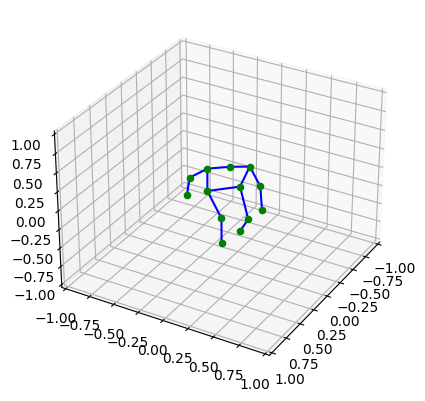

In [11]:
###우리꺼 맞게
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
# ax.scatter3D(0,0,0, color='r',s= 100 )

for i, (x,y,z) in enumerate(ego_skeleton):
    if i==10 or i==14:
        continue
    else:
        ax.scatter3D(x,y,z,color='g')

lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
         (7, 8), (8, 9), (11, 12), (12, 13), (7, 11)]
for i,j in lines:
    x1, y1, z1 = ego_skeleton[i]
    x2, y2, z2 = ego_skeleton[j]
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'b-')  # 'b-'는 파란색 실선을 의미합니다.

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.view_init(30, 30)

In [15]:
heatmap_sequence = ["Neck", "Right_shoulder", "Right_elbow", "Right_wrist", "Left_shoulder", "Left_elbow",
                        "Left_wrist", "Right_hip", "Right_knee", "Right_ankle", "Right_foot", "Left_hip",
                        "Left_knee", "Left_ankle", "Left_foot"]

file_path = "output_skeleton_cctv_oneimg.json" 
dict_json = {}

dict_lines={}
for i,j in lines:
    x1, y1, z1 = ego_skeleton[i]
    x2, y2, z2 = ego_skeleton[j]
    dict_lines['%s to %s'%(heatmap_sequence[i], heatmap_sequence[j])] = {'start_point' : [x1, y1, z1], 'end_point' :[x2, y2, z2]}
dict_lines = {key_line:{k: list(map(float,v)) for k,v in v_line.items()} for key_line, v_line in dict_lines.items()}
dict_lines
# dict_json[os.path.basename(filename).split('.')[0]] = dict_lines

{'Neck to Right_shoulder': {'start_point': [0.16447753733098355,
   0.15410274661190257,
   0.4597168913276913],
  'end_point': [0.26077104638659737,
   -0.01157746356039237,
   0.43544624390944414]},
 'Neck to Left_shoulder': {'start_point': [0.16447753733098355,
   0.15410274661190257,
   0.4597168913276913],
  'end_point': [0.0220773372301669, 0.2720517353714084, 0.4138817803880459]},
 'Right_shoulder to Right_elbow': {'start_point': [0.26077104638659737,
   -0.01157746356039237,
   0.43544624390944414],
  'end_point': [0.224068574159665, -0.21170108658240186, 0.2181938926095985]},
 'Right_elbow to Right_wrist': {'start_point': [0.224068574159665,
   -0.21170108658240186,
   0.2181938926095985],
  'end_point': [0.2233985609442338,
   -0.24238050008257023,
   -0.024823468292356744]},
 'Left_shoulder to Left_elbow': {'start_point': [0.0220773372301669,
   0.2720517353714084,
   0.4138817803880459],
  'end_point': [-0.038120354300760155,
   0.3443871598630106,
   0.14093988283426773]},

In [19]:
import json, codecs
json.dump(dict_lines, codecs.open(file_path, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4)